<a href="https://colab.research.google.com/github/Psyclophe/Data-Scientist/blob/main/Prophet%20Airpassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
import statsmodels.api as sm
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

**Importa DATA**

In [ ]:
url = 'https://raw.githubusercontent.com/Psyclophe/Data-Scientist/main/AirPassengers.csv'
df = pd.read_csv (url)
print('Shape of data',df.shape)
df.head(5)

Shape of data (144, 2)


Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
df.rename(columns = {'#Passengers':'AirPassengers'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [ ]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121

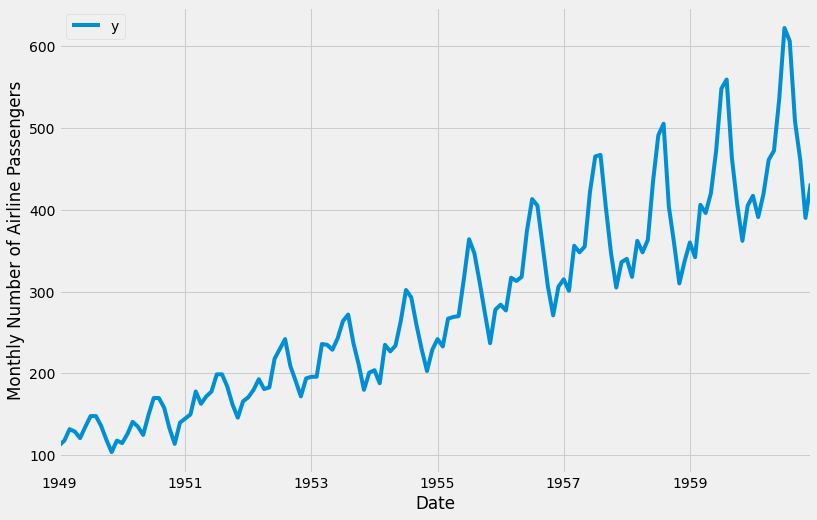

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/xbin_ch6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/qz1oxkap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29975', 'data', 'file=/tmp/tmp5835y9v3/xbin_ch6.json', 'init=/tmp/tmp5835y9v3/qz1oxkap.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_modelhv_3ddb_/prophet_model-20221231004721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

ds
0 1949-01-01
1 1949-02-01
2 1949-03-01
3 1949-04-01
4 1949-05-01

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.775671   42.599747  129.575393
1 1949-02-01   78.186197   31.235867  121.001786
2 1949-03-01  110.356274   69.869306  152.850529
3 1949-04-01  107.840251   61.627432  155.004872
4 1949-05-01  111.351471   67.760916  158.034888

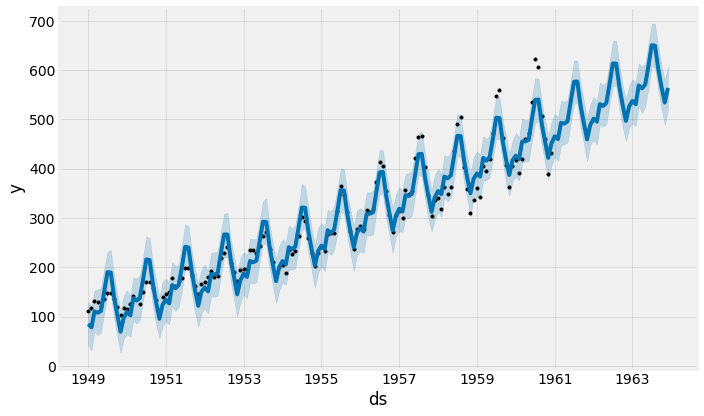

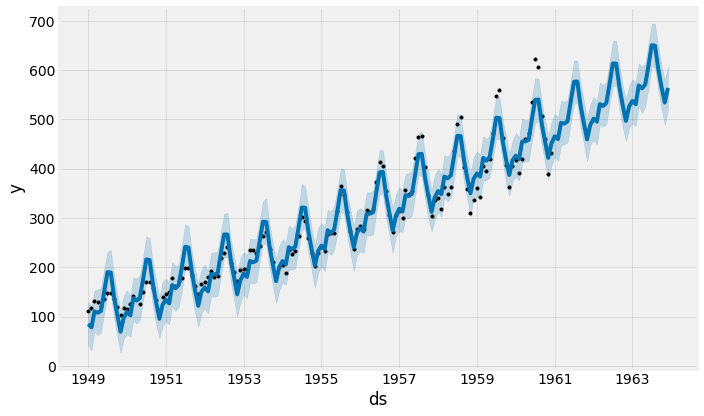

In [ ]:
my_model.plot(forecast, uncertainty=True)

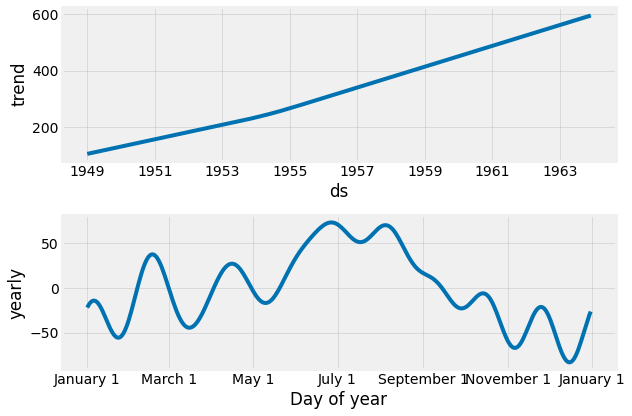

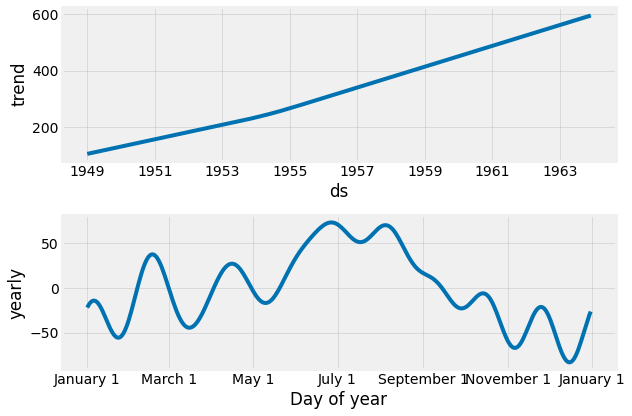

In [ ]:
my_model.plot_components(forecast)

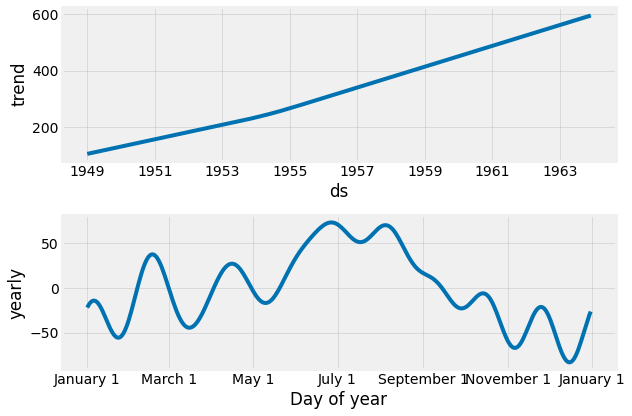

In [ ]:
fig1 = my_model.plot_components(forecast)

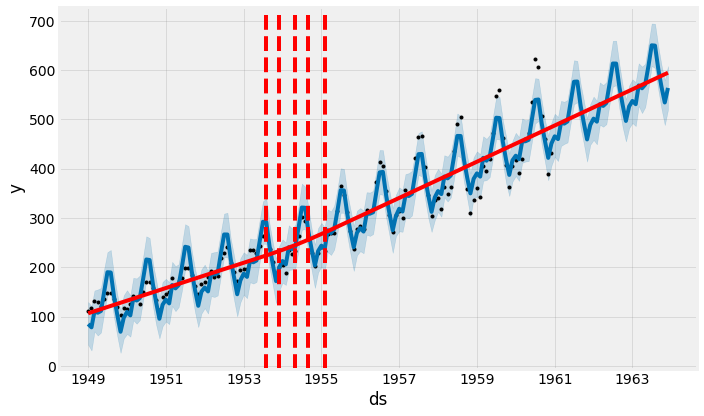

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [ ]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/eauigxe9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/fiz4x0p5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19710', 'data', 'file=/tmp/tmp5835y9v3/eauigxe9.json', 'init=/tmp/tmp5835y9v3/fiz4x0p5.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_model93bqoo_l/prophet_model-20221231004723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


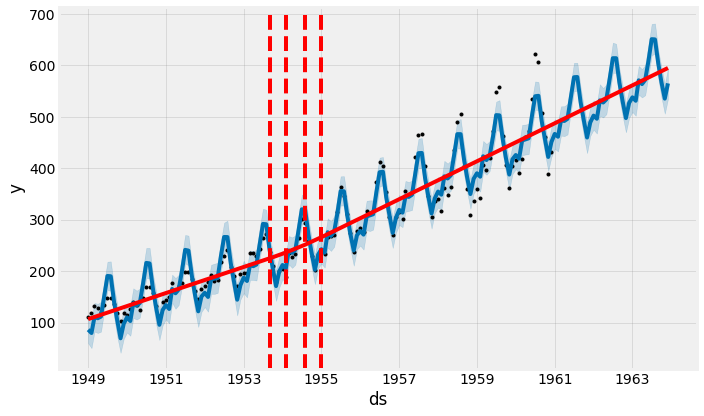

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/otlypfuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/r6mgj2fe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80121', 'data', 'file=/tmp/tmp5835y9v3/otlypfuw.json', 'init=/tmp/tmp5835y9v3/r6mgj2fe.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_modelc2fqxtv1/prophet_model-20221231004724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


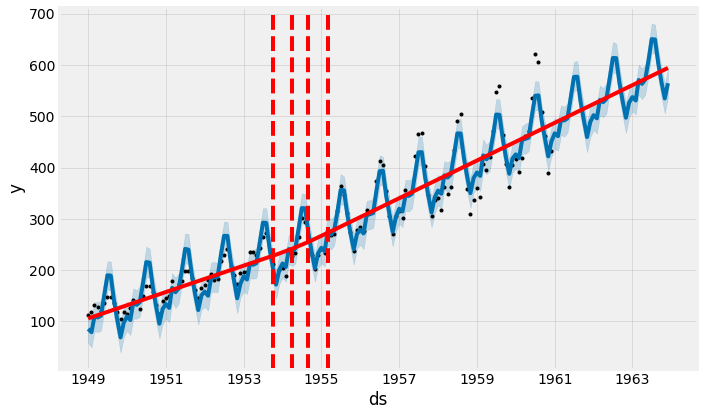

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/wcxjllfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/j4u4smtu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31366', 'data', 'file=/tmp/tmp5835y9v3/wcxjllfq.json', 'init=/tmp/tmp5835y9v3/j4u4smtu.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_modellk9kls5j/prophet_model-20221231004725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


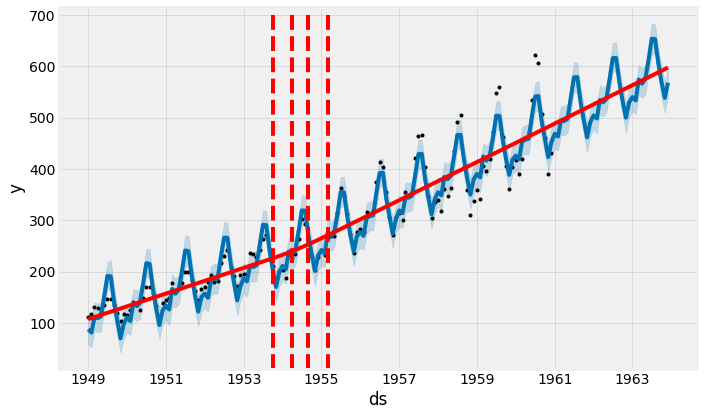

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/lx5a38tx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/i_2lkucf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26348', 'data', 'file=/tmp/tmp5835y9v3/lx5a38tx.json', 'init=/tmp/tmp5835y9v3/i_2lkucf.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_model7tayavha/prophet_model-20221231004726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
00:47:26 - cmdstanpy - ERROR - Chain [1] 

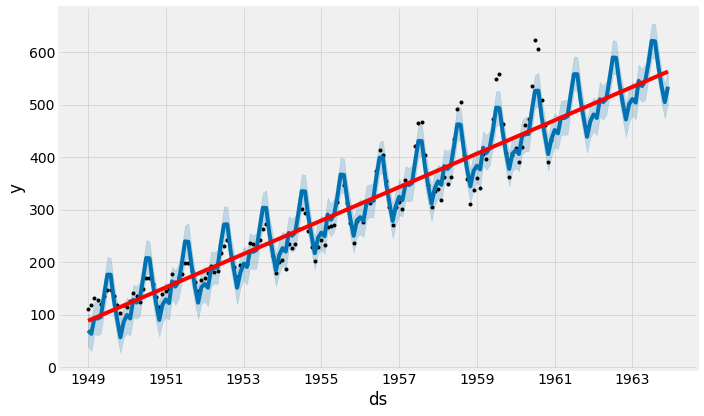

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

Third PART

In [ ]:
!pip install pandas matplotlib numpy cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/Psyclophe/Data-Scientist/main/AirPassengers.csv'
df = pd.read_csv (url)
print('Shape of data',df.shape)
df.head(5)

Shape of data (144, 2)


Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df.head(5)

ds    y
0  1949-01  112
1  1949-02  118
2  1949-03  132
3  1949-04  129
4  1949-05  121

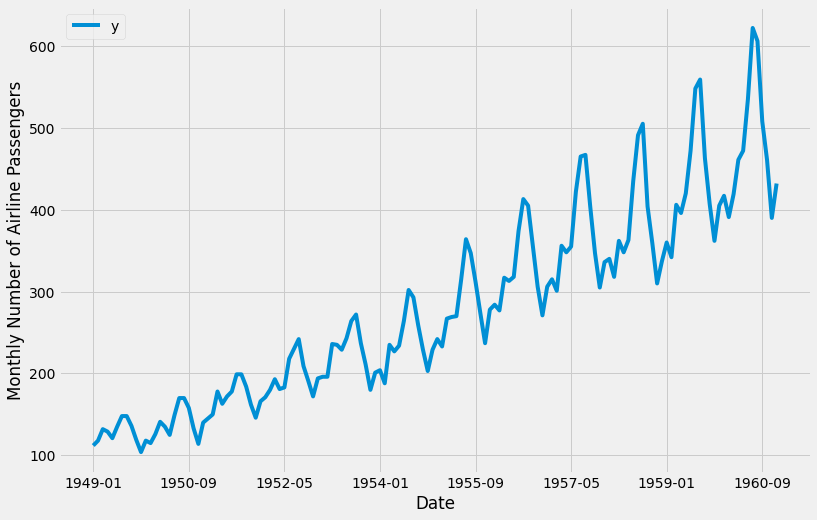

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/c_zc1x4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5835y9v3/recl322x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86472', 'data', 'file=/tmp/tmp5835y9v3/c_zc1x4l.json', 'init=/tmp/tmp5835y9v3/recl322x.json', 'output', 'file=/tmp/tmp5835y9v3/prophet_model2pejjcot/prophet_model-20221231005404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:54:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

ds
175 1963-08-01
176 1963-09-01
177 1963-10-01
178 1963-11-01
179 1963-12-01

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
175 1963-08-01  649.856119  604.006732  694.686358
176 1963-09-01  602.345796  555.747471  646.382485
177 1963-10-01  566.338782  525.350512  612.322701
178 1963-11-01  534.377276  487.285360  576.919649
179 1963-12-01  563.954392  516.940375  607.012537

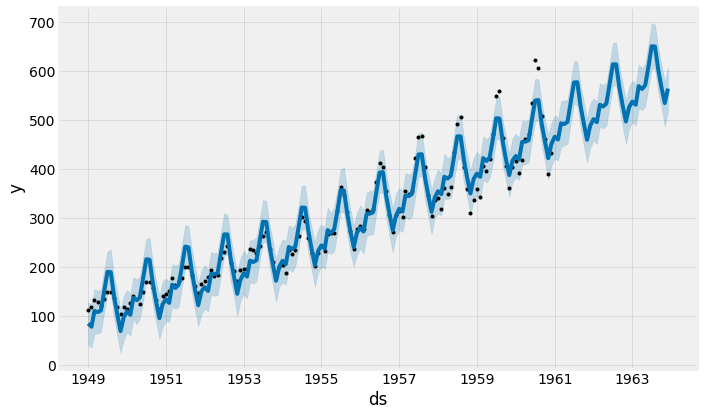

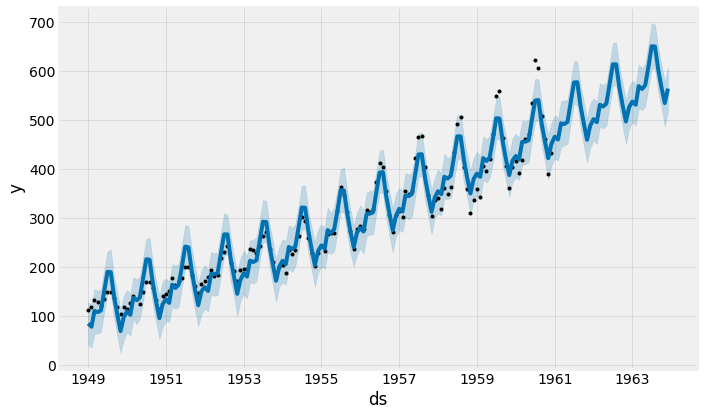

In [ ]:
my_model.plot(forecast,
              uncertainty=True)

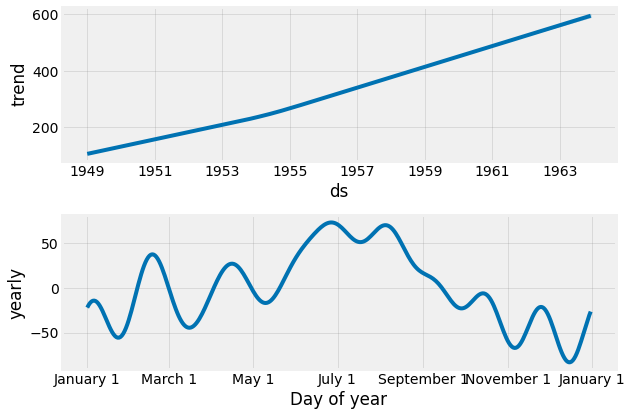

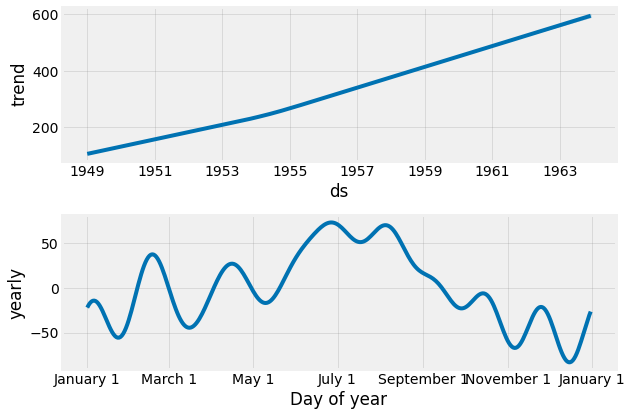

In [ ]:
my_model.plot_components(forecast)

In [ ]:
df.columns = ['Date','Number of Passengers']

df.head()

Date  Number of Passengers
0  1949-01                   112
1  1949-02                   118
2  1949-03                   132
3  1949-04                   129
4  1949-05                   121

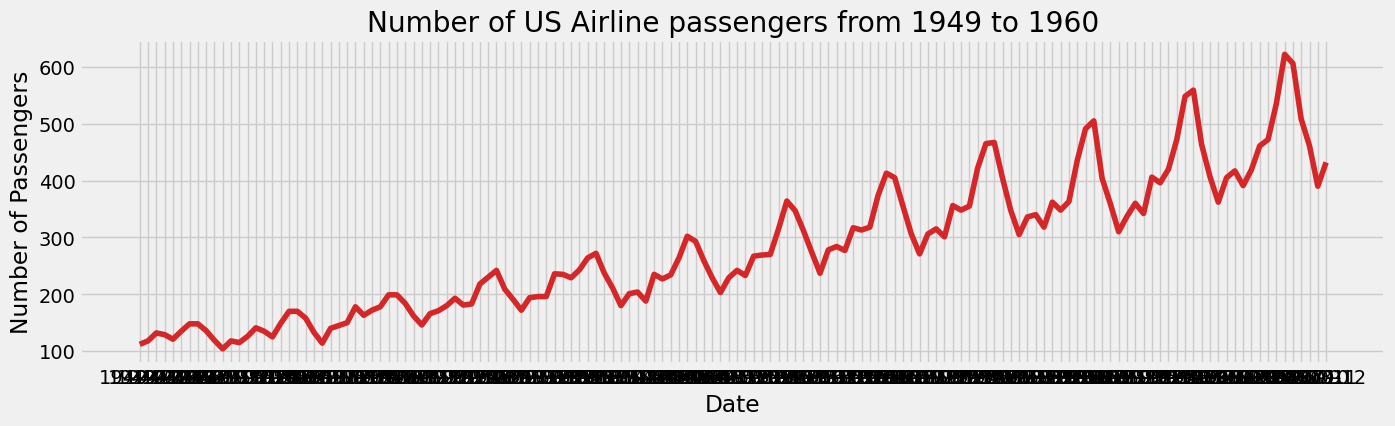

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

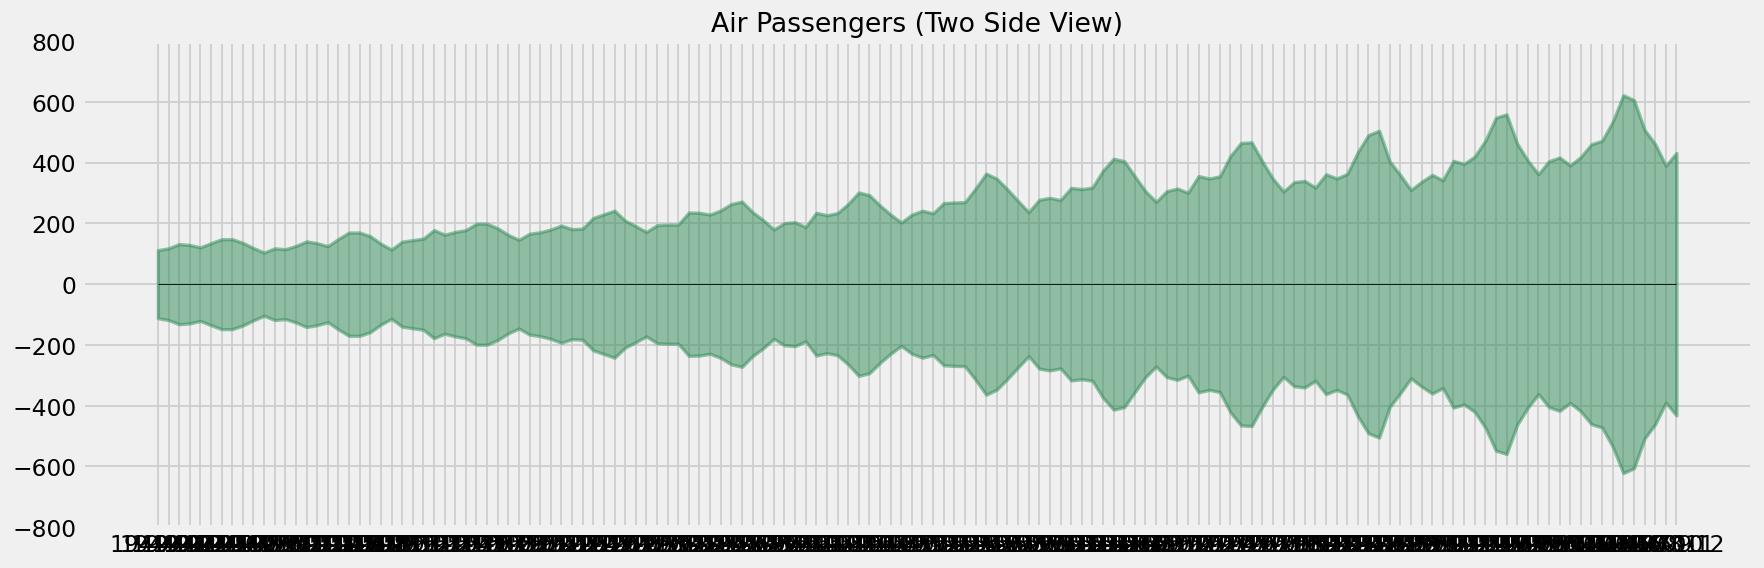

In [ ]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

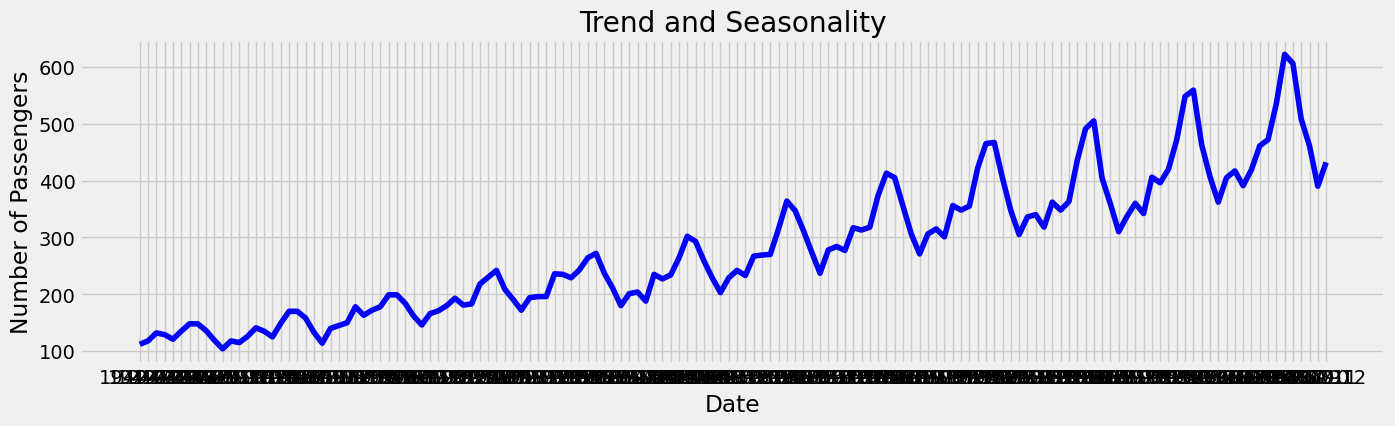

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

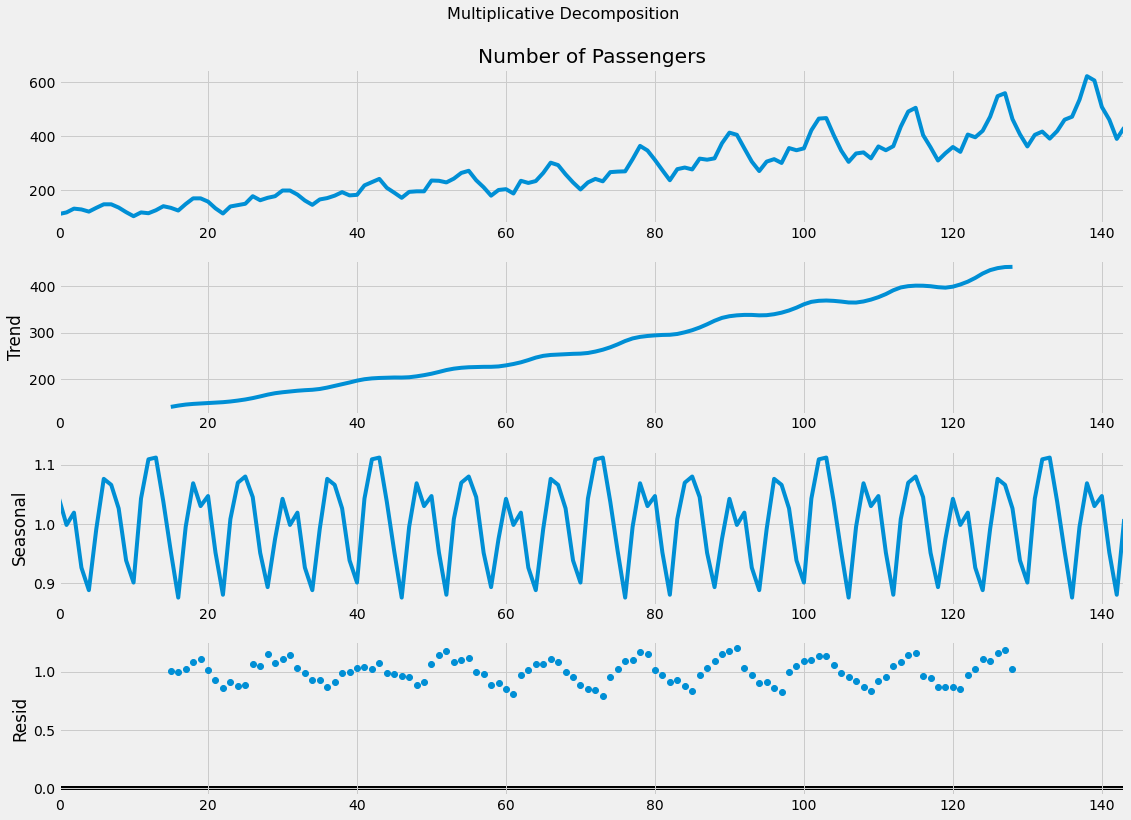

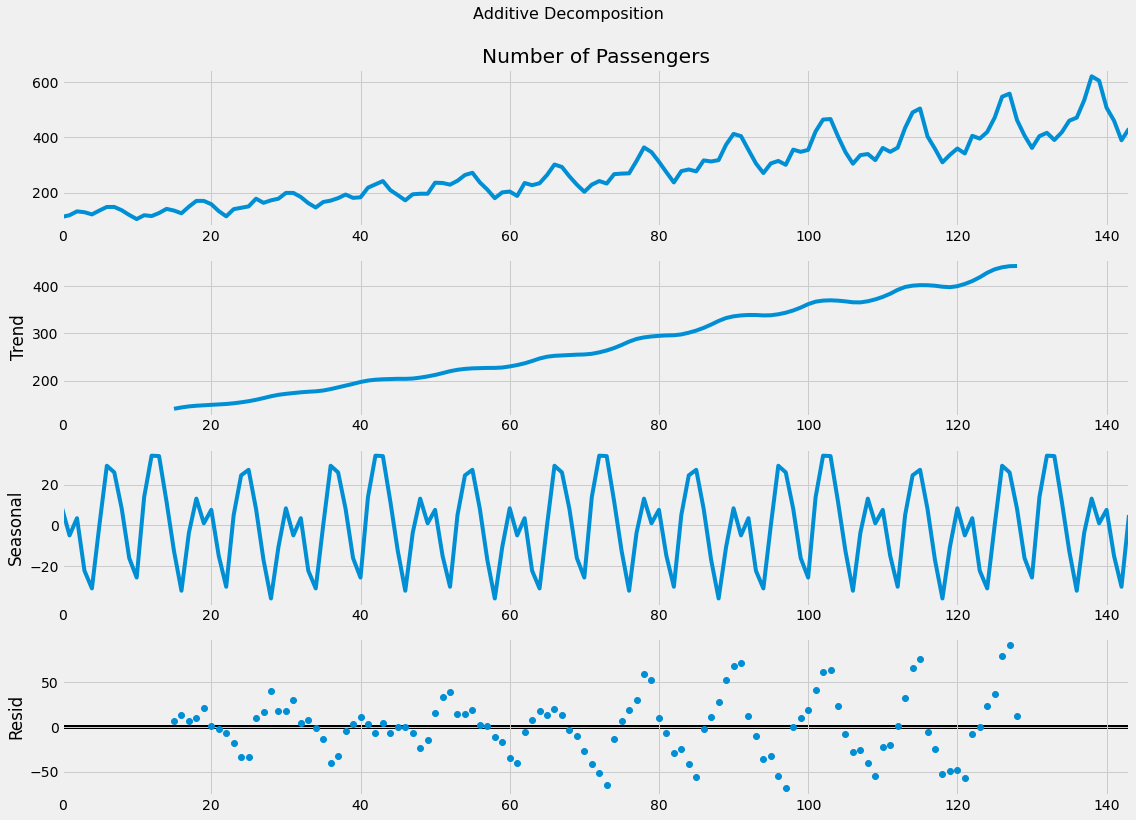

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

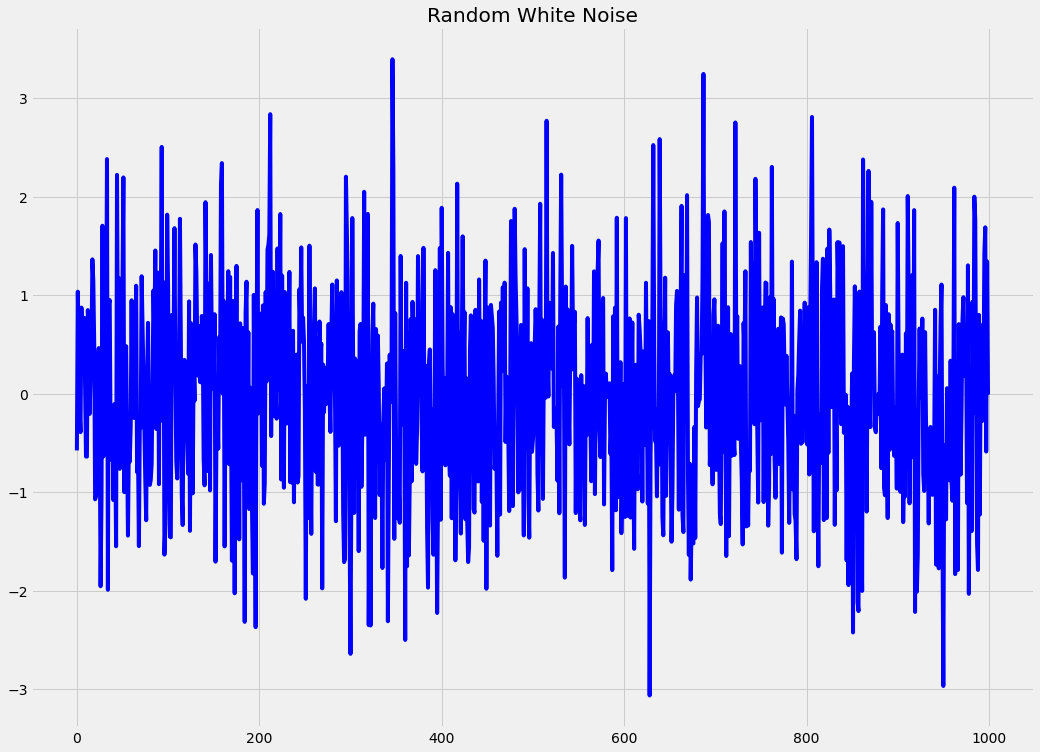

In [88]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

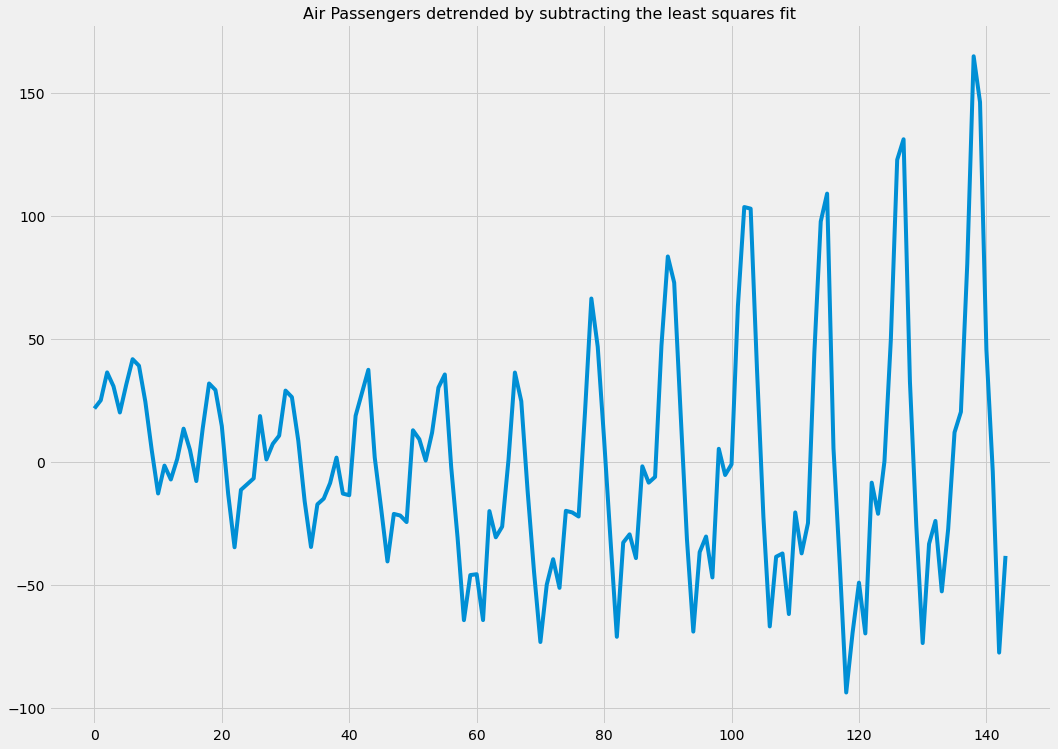

In [89]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the trend component')

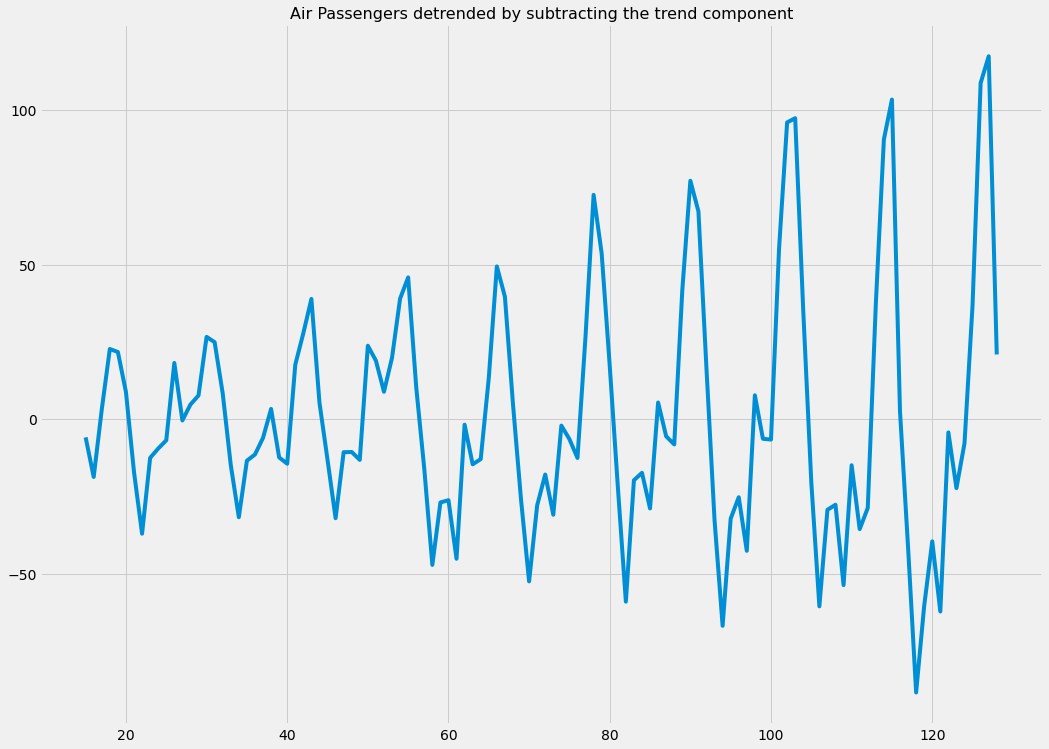

In [90]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)

[]

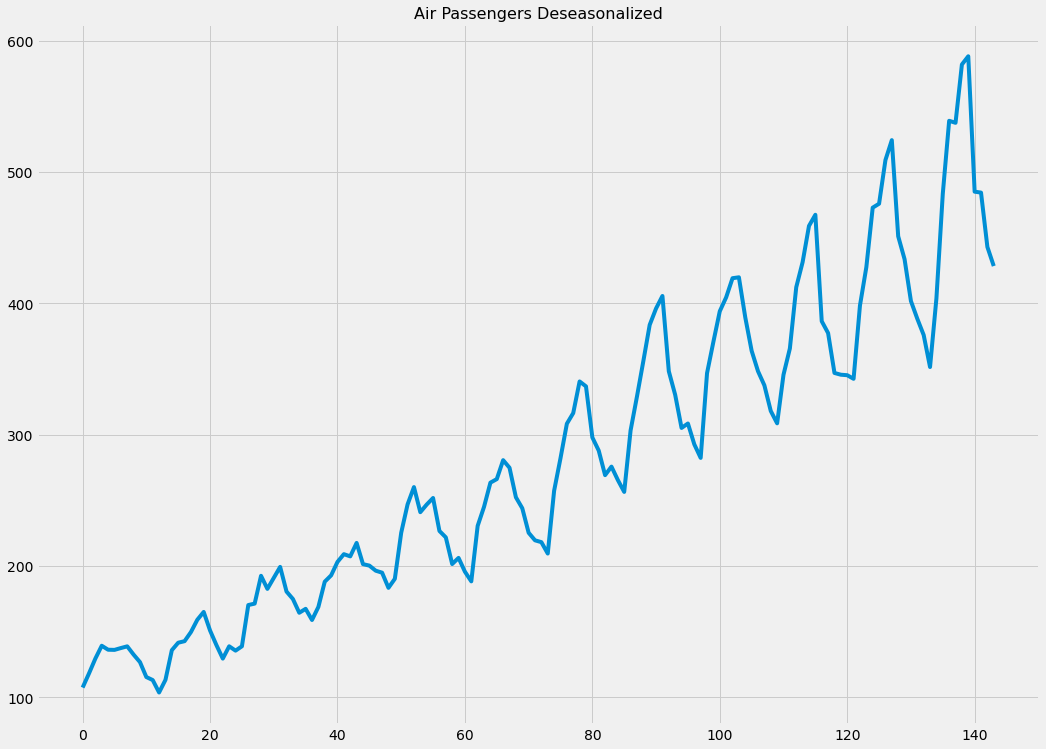

In [91]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()

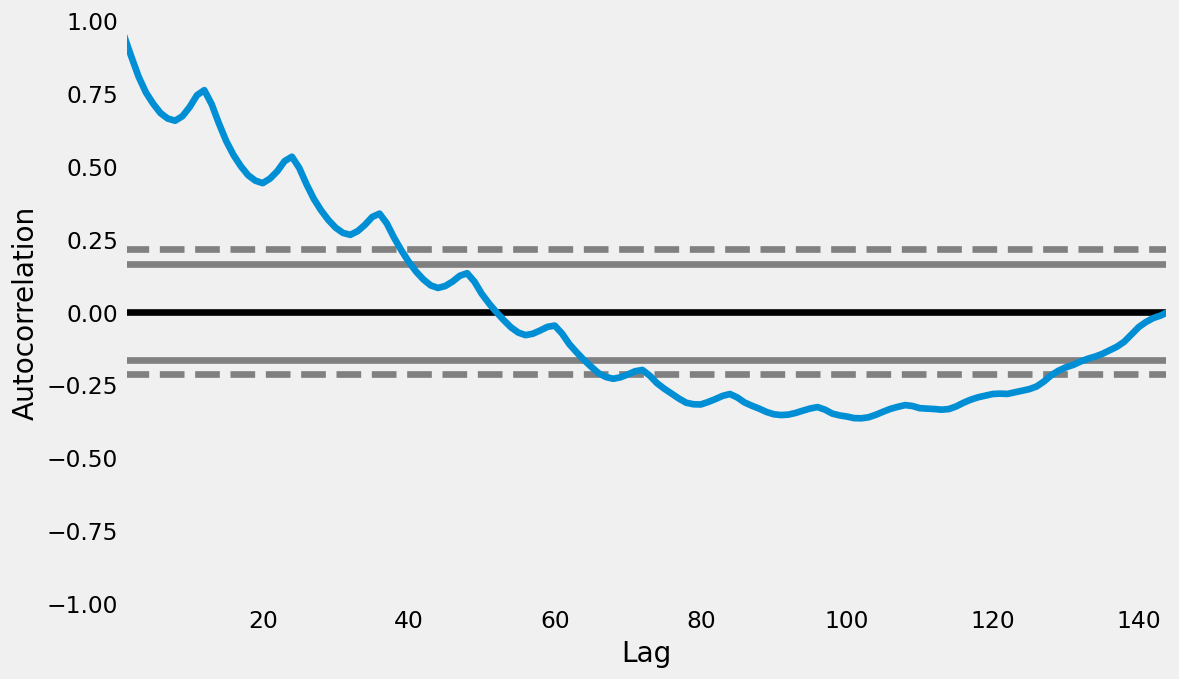

In [92]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



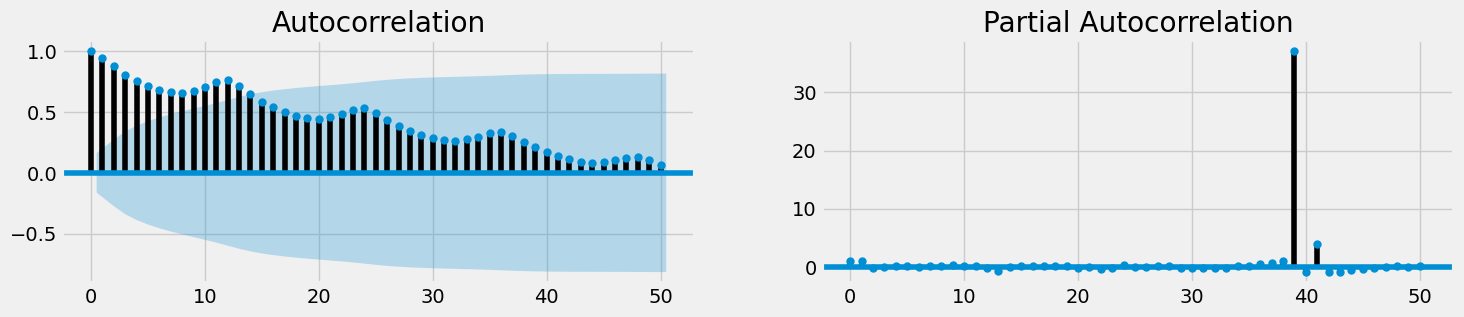

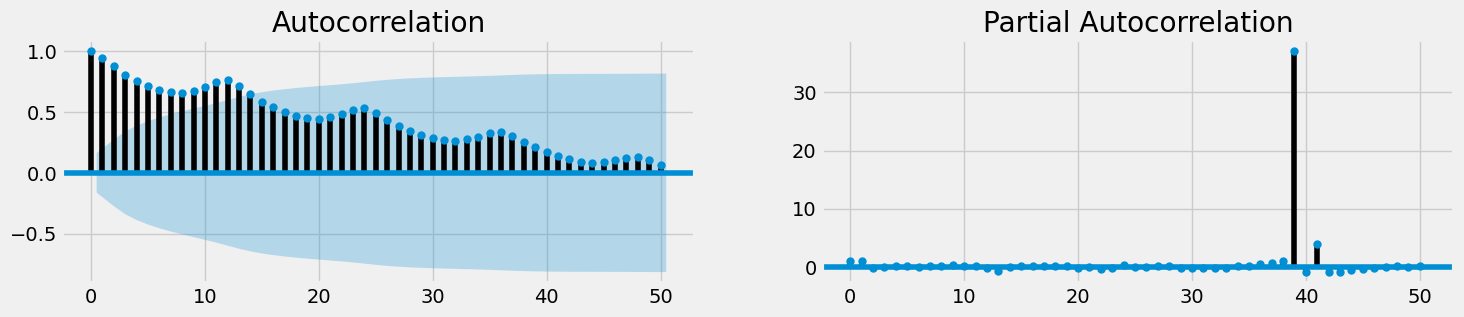

In [93]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

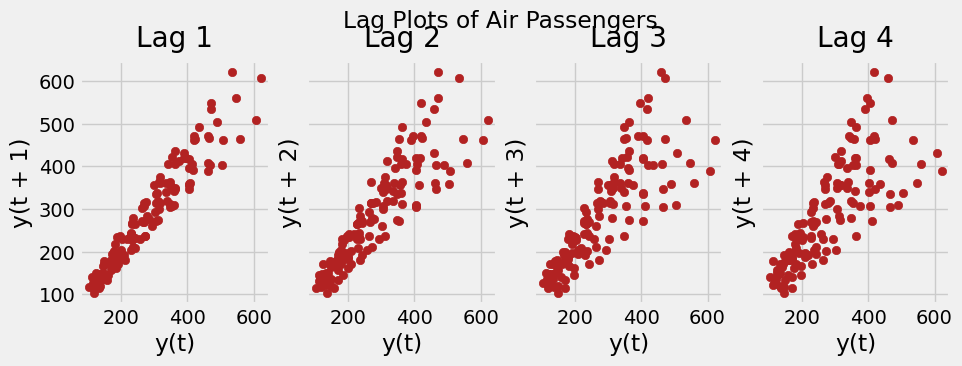

In [94]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

In [95]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('/kaggle/input/dataset/dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)

FileNotFoundError: ignored